<a href="https://colab.research.google.com/github/MichalBalcerak/ML24-25/blob/main/Homework05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, let's consider example given in class: \\
*The following code was directly copied from the class lab in order to have the same situation as before.*

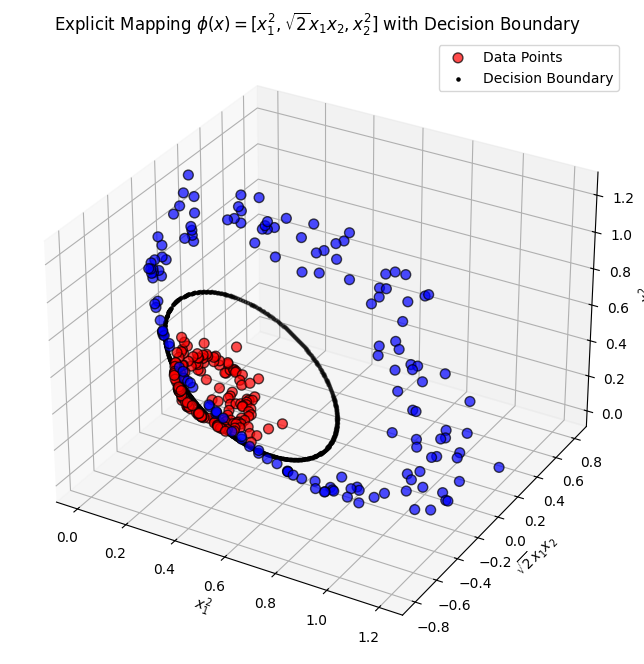

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles

# 1. Generate Data (Concentric Circles for Non-Linear Separation)
np.random.seed(42)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)

# Convert labels from (0,1) to (-1,1) for SVM
y = np.where(y == 0, -1, 1)

# 2. Train SVM with Polynomial Kernel (Degree 2, c=0)
clf = SVC(kernel='poly', degree=2, C=1.0, coef0=0, gamma=1)
# scikit uses a complex scaled gamma for the kernels. Here we want to use non-optimal (but simplest!) kernels
# K(x, x') = (x^T x')^2
clf.fit(X, y)

# 3. Create Meshgrid for Plotting Decision Boundary
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Flatten and Stack Grid for Prediction
grid = np.c_[xx.ravel(), yy.ravel()]
decision = clf.decision_function(grid)
decision = decision.reshape(xx.shape)



# 3D Plot for phi(x) with Decision Boundary
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 5. Visualize Explicit Mapping phi(x) = [x1^2, sqrt(2) x1 x2, x2^2]

# Apply phi(x) to each point
phi_X = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in X])

# Apply phi(x) to the meshgrid for decision boundary
phi_grid = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in grid])

# Scatter plot of transformed data
ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7, label='Data Points')

# Plot only the decision boundary contour (i.e. where decision == 0)
grid_decision = clf.decision_function(grid)
contour_mask = np.isclose(grid_decision, 0, atol=0.01)  # select points near decision boundary
ax.scatter(phi_grid[contour_mask, 0], phi_grid[contour_mask, 1], phi_grid[contour_mask, 2],
           c='k', s=5, label='Decision Boundary')

# Set axis labels and title for 3D plot
ax.set_title('Explicit Mapping $\phi(x) = [x_1^2, \sqrt{2} x_1 x_2, x_2^2]$ with Decision Boundary')
ax.set_xlabel('$x_1^2$')
ax.set_ylabel('$\sqrt{2} x_1 x_2$')
ax.set_zlabel('$x_2^2$')

# Add legend and grid
ax.legend()
ax.grid(True)

plt.show()


# Why does the SVM's decision boundary in the higher-dimensional (3D) feature space not look like a “flat” hyperplane, even though we know the classifier’s separating surface is mathematically linear in that space?

Wiemy, że płaszczyzna rozdzielająca jest tu rzeczywiście powierzchnią liniową - dwuwymiarową płaszczyzną $K$, jednakże dla $(a,b)\in\mathbb{R}^2$ po zastosowaniu $\phi$ mamy $\phi(a,b)=(a^2,\sqrt{2}ab,b^2)\in M$, gdzie $M$ jest stożkiem w $\mathbb{R}^3$, który (po odpowiednim przekształceniu) możemy przedstawić następująco: $M=\{(x,y,x)\in\mathbb{R}^3: y^2=2xz\}$. To co widzimy jako granicę decyzyjną to właśnie przecięcie $K\cap M$, czyli elipsa.\
Oto wizualizacja zbioru $M$ wraz z punktami oraz granicą decyzyjną.

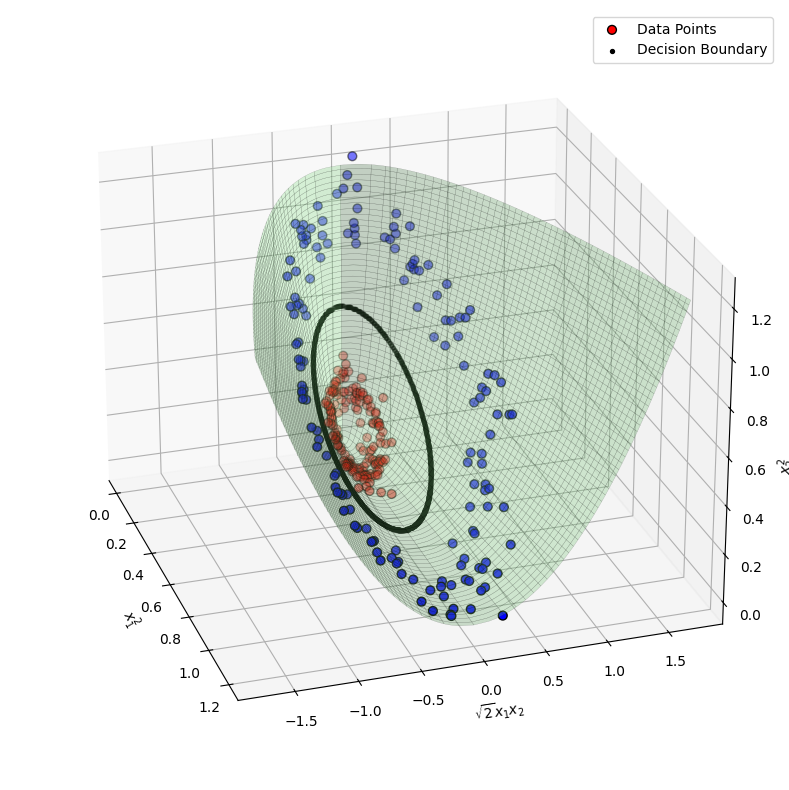

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


phi_X = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in X])


x = np.linspace(0.0, 1.2, 200)
z = np.linspace(0.0, 1.2, 200)
X_grid, Z_grid = np.meshgrid(x, z)
Y_pos = np.sqrt(2 * X_grid * Z_grid)
Y_neg = -Y_pos
Y = np.concatenate((Y_neg, Y_pos))


grid = np.c_[xx.ravel(), yy.ravel()]
grid_phi = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in grid])
decision = clf.decision_function(grid)
mask = np.isclose(decision, 0, atol=0.01)
boundary_points = grid_phi[mask]


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


ax.plot_surface(X_grid, Y_pos, Z_grid, color='lightgreen', alpha=0.3, edgecolor='k', linewidth=0.2)
ax.plot_surface(X_grid, Y_neg, Z_grid, color='lightgreen', alpha=0.3, edgecolor='k', linewidth=0.2)


colors = np.where(y == 1, 'red', 'blue')
ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2], c=colors, s=40, edgecolors='k', label='Data Points')


ax.scatter(boundary_points[:, 0], boundary_points[:, 1], boundary_points[:, 2],
           c='black', s=8, label='Decision Boundary')


ax.set_xlabel('$x_1^2$')
ax.set_ylabel('$\sqrt{2} x_1 x_2$')
ax.set_zlabel('$x_2^2$')
ax.set_title('')
ax.invert_xaxis()
ax.invert_yaxis()
ax.legend()
ax.grid(True)
ax.view_init(elev=25, azim=162)
plt.tight_layout()
plt.show()



# Explain why a hyperplane in 3D becomes a circular (or elliptical) curve when viewed back in the original 2D plane of the dataset.

A hyperplane in 3D induced by the kernel transformation $\phi$ intersects the curved 2D manifold (e.g. a cone) embedded in 3D on which the transformed data lies. This intersection is a curve (such as an elipse) embedded in 3D. When we view back this intersection in the original 2D plane of the dataset, we observe its preimage under $\phi$. This preimage is also an elliptical curve because $\phi$ is a differentiable immersion - that is, its Jacobian has maximal rank, which ensures that the dimension of the image is equal to the dimension of the curve in the feature space.